In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/BusinessIntelligence_Python/Data_Code/Telco-Customer-Churn.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df.head(n=6)

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes
5  9305-CDSKC  Female              0  ...          99.65        820.5    Yes

[6 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Quantitiative variable

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df[['MonthlyCharges', 'TotalCharges', 'tenure']].describe() #stats for numeric variables

MonthlyCharges  TotalCharges       tenure
count     7043.000000   7032.000000  7043.000000
mean        64.761692   2283.300441    32.371149
std         30.090047   2266.771362    24.559481
min         18.250000     18.800000     0.000000
25%         35.500000    401.450000     9.000000
50%         70.350000   1397.475000    29.000000
75%         89.850000   3794.737500    55.000000
max        118.750000   8684.800000    72.000000

Label Encoding

In [8]:
# Label encoding for 'Yes' and 'No' features:
from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
encoder = LabelEncoder()

In [9]:
#binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
binary_cols=['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']
#df[binary_cols] = df[binary_cols].astype('category')
df[binary_cols]=df[binary_cols].astype('category')

In [10]:
for each in binary_cols:
    df[each] = encoder.fit_transform(df[each])

In [11]:
cols_for_dummies = ['MultipleLines', 'Contract', 'InternetService', 
                    'PaymentMethod', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_ = df.drop(cols_for_dummies, axis=1)
dms = pd.get_dummies(df[cols_for_dummies])
df = pd.concat([df_, dms], axis=1)

In [12]:
df.head()

customerID  gender  ...  StreamingMovies_No internet service  StreamingMovies_Yes
0  7590-VHVEG       0  ...                                    0                    0
1  5575-GNVDE       1  ...                                    0                    0
2  3668-QPYBK       1  ...                                    0                    0
3  7795-CFOCW       1  ...                                    0                    0
4  9237-HQITU       0  ...                                    0                    0

[5 rows x 42 columns]

In [13]:
df.columns = df.columns.str.lower()

In [14]:
#df.dropna(inplace=True)
df.dropna(inplace=True)
df = df.drop('customerid', axis=1)

std the quantitative data

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['tenure', 'monthlycharges', 'totalcharges']] = scaler.fit_transform(df[['tenure', 'monthlycharges', 'totalcharges']])

In [17]:
df.head()

gender  ...  streamingmovies_yes
0       0  ...                    0
1       1  ...                    0
2       1  ...                    0
3       1  ...                    0
4       0  ...                    0

[5 rows x 41 columns]

set up for analysis

In [18]:
#y = df['churn']
y=df['churn']
X = df.drop('churn', axis=1)
#y=df['churn']
#X=df.drop('churn', axis=1)

In [19]:
from sklearn.model_selection import train_test_split
#80% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [20]:
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
loj=LogisticRegression(solver='liblinear')
#loj = LogisticRegression(solver='liblinear')

In [21]:
#loj_model = loj.fit(X_train, y_train)
loj_model=loj.fit(X_train,y_train)


In [22]:
#y_pred = loj_model.predict(X_test)
y_pred=loj_model.predict(X_test)
y_pred_prob = loj_model.predict_proba(X_test)

In [ ]:
y_pred_prob #Predictions with the probabilities

array([[0.99658472, 0.00341528],
       [0.31865635, 0.68134365],
       [0.92564387, 0.07435613],
       ...,
       [0.92753393, 0.07246607],
       [0.93815328, 0.06184672],
       [0.81555096, 0.18444904]])

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt 

Accuracy of the default model  : 0.80
Precision of the default model : 0.63
Recall of the default model    : 0.54
F1 Score of the default model  : 0.58


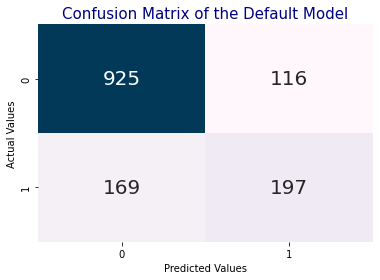

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

print('Accuracy of the default model  : %.2f' % accuracy_score(y_test, y_pred)) # actual 20% y, predicted y
print('Precision of the default model : %.2f' % precision_score(y_test, y_pred))
print('Recall of the default model    : %.2f' % recall_score(y_test, y_pred))
print('F1 Score of the default model  : %.2f' % f1_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"fontsize":20}, fmt='d', cbar=False, cmap='PuBu')
plt.title('Confusion Matrix of the Default Model', color='navy', fontsize=15)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 5625
Model:                            GLM   Df Residuals:                     5601
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2336.9
Date:                Mon, 20 Dec 2021   Deviance:                       4673.8
Time:                        02:26:39   Pearson chi2:                 6.33e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.1322      0.230      0.576      0.565      -0.318       0.582
gender                                     -0.0187      0.072     -0.258      0.796      -0.161       0.123
seniorcitizen                               0.2366      0.094      2.522      0.012       0.053       0.420
partner                                    -0.0230      0.087     -0.265      0.791      -0.193       0.147
dependents                                 -0.1077      0.100     -1.076      0.282      -0.304       0.088
tenure                                     -4.3170      0.499     -8.659      0.000      -5.294      -3.340
phoneservice                                0.3082      0.413      0.747      0.455      -0.501       1.117
paperlessbilling                            0.3031      0.083      3.652      0.000       0.140       0.466
monthlycharges                             -5.1801      3.551     -1.459      0.145     -12.140       1.780
totalcharges                                2.7237      0.687      3.964      0.000       1.377       4.070
multiplelines_no                           -0.1035      0.126     -0.821      0.411      -0.350       0.143
multiplelines_no phone service             -0.1759      0.195     -0.902      0.367      -0.558       0.206
multiplelines_yes                           0.4116      0.298      1.382      0.167      -0.172       0.995
contract_month-to-month                     0.7391      0.112      6.618      0.000       0.520       0.958
contract_one year                           0.0935      0.115      0.813      0.416      -0.132       0.319
contract_two year                          -0.7004      0.149     -4.695      0.000      -0.993      -0.408
internetservice_dsl                        -0.7922      0.273     -2.898      0.004      -1.328      -0.256
internetservice_fiber optic                 1.2523      0.616      2.034      0.042       0.045       2.459
internetservice_no                         -0.3279      0.119     -2.757      0.006      -0.561      -0.095
paymentmethod_bank transfer (automatic)    -0.0510      0.096     -0.529      0.597      -0.240       0.138
paymentmethod_credit card (automatic)       0.0108      0.096      0.112      0.910      -0.178       0.199
paymentmethod_electronic check              0.2955      0.082      3.623      0.000       0.136       0.455
paymentmethod_mailed check                 -0.1231      0.095     -1.299      0.194      -0.309       0.063
onlinesecurity_no                           0.2685      0.097      2.757      0.006       0.078       0.459
onlinesecurity_no internet service         -0.3279      0.119     -2.757      0.006      -0.561      -0.095
onlinesecurity_yes                          0.1916      0.2